In [17]:
import pandas as pd
import re

def clean_singapore_demographics_csv(file_path):
    # Read the raw CSV file
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Find lines that contain actual data (not headers, notes, or empty lines)
    data_lines = []
    current_planning_area = None
    
    for line in lines:
        # Split by semicolon and clean
        parts = [part.strip() for part in line.split(';')]
        
        # Skip if line doesn't have enough columns or is clearly a header/note
        if len(parts) < 20:
            continue
        
        # Skip header lines, notes, and empty lines
        if (parts[1] in ['GENERAL HOUSEHOLD SURVEY 2015', 'Table 7', 'Planning Area', '', 'Note:'] or
            'continued' in parts[1] or 'Number' in parts[1] or parts[1] == 'Total'):
            continue
        
        # Check if this is a planning area row (has data in column 1)
        if parts[1] and parts[1] != '' and not parts[1].startswith(' '):
            current_planning_area = parts[1]
            
            # If it also has subzone data in column 2, it's a planning area total
            if parts[2] and parts[2] != '':
                # This is a planning area total row
                clean_row = [current_planning_area, 'Total'] + parts[3:]
                data_lines.append(clean_row)
        
        # Check if this is a subzone row (empty column 1, data in column 2)
        elif not parts[1] and parts[2] and current_planning_area:
            # This is a subzone row
            clean_row = [current_planning_area, parts[2]] + parts[3:]
            data_lines.append(clean_row)
    
    # Create column names
    columns = ['Planning_Area', 'Subzone', 'Total', 'Age_0_4', 'Age_5_9', 'Age_10_14', 
               'Age_15_19', 'Age_20_24', 'Age_25_29', 'Age_30_34', 'Age_35_39', 
               'Age_40_44', 'Age_45_49', 'Age_50_54', 'Age_55_59', 'Age_60_64', 
               'Age_65_69', 'Age_70_74', 'Age_75_79', 'Age_80_84', 'Age_85_Over']
    
    # Create DataFrame
    df = pd.DataFrame(data_lines, columns=columns)
    
    # Clean numeric data
    for col in columns[2:]:  # Skip Planning_Area and Subzone
        df[col] = df[col].apply(clean_numeric)
    
    # Remove rows where all numeric columns are 0 or empty
    numeric_cols = columns[2:]
    df = df[df[numeric_cols].sum(axis=1) > 0]
    
    # Reset index
    df = df.reset_index(drop=True)
    
    return df

def clean_numeric(value):
    """Clean numeric values - remove dots used as thousands separators, handle dashes"""
    if pd.isna(value) or value == '' or value == '-':
        return 0
    
    # Remove dots used as thousands separators (e.g., "3.902.690" -> "3902690")
    if isinstance(value, str):
        # Remove dots that are thousands separators
        value = re.sub(r'(\d)\.(\d{3})', r'\1\2', value)
        value = re.sub(r'(\d)\.(\d{3})', r'\1\2', value)  # Run twice for numbers like 3.902.690
        
        # Convert to numeric
        try:
            return int(value)
        except:
            return 0
    
    return value

# Usage
cleaned_df = clean_singapore_demographics_csv('../../datasets/SingaporeStatistic_Residential_AgeGroup/SingStat_ResidentPopulationBy_AgeGroup.csv')

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 50)       # Show up to 50 rows
pd.set_option('display.width', None)        # Auto-adjust width
pd.set_option('display.max_colwidth', 20)   # Limit column width

# Now display your dataframe
cleaned_df

,Planning_Area,Subzone,Total,Age_0_4,Age_5_9,Age_10_14,Age_15_19,Age_20_24,Age_25_29,Age_30_34,Age_35_39,Age_40_44,Age_45_49,Age_50_54,Age_55_59,Age_60_64,Age_65_69,Age_70_74,Age_75_79,Age_80_84,Age_85_Over
0,Ang Mo Kio,Total,174770,6790,7660,8290,9320,10310,11170,12250,13070,13710,13000,14010,13800,12980,11050,6670,5140,3250,2300
1,Bedok,Total,289750,11690,13400,14750,16930,19450,19860,19270,20850,22520,21460,23430,23380,20590,16750,9310,7330,4760,4010
2,Bishan,Total,90700,3430,4330,4710,5520,6860,6460,5720,6000,7070,6800,7540,7700,6360,4860,2730,2140,1370,1090
3,Boon Lay,Total,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bukit Batok,Total,139270,5510,6890,7970,9240,10070,10460,9760,9940,10980,11310,12190,11770,9370,5990,3060,2230,1450,1090
5,Bukit Merah,Total,155840,7210,7480,6640,6860,7700,9340,11070,12840,12730,11320,11320,11740,10920,10030,6480,5590,3540,3010
6,Bukit Panjang,Total,139030,7330,7630,8460,9420,10400,10980,10690,10010,11180,10540,11620,10680,7880,5190,2740,2000,1290,1010
7,Bukit Timah,Total,74470,3140,4660,4810,4820,4980,4310,3770,4940,6630,6330,5820,5330,4550,3930,2380,1880,1210,1000
8,Central Water Ca...,Total,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Changi,Total,2530,180,230,220,150,130,100,170,240,290,220,140,120,90,90,50,30,30,40


In [23]:
# =============================================================================
# PROPERTY MARKET DEMOGRAPHIC ANALYSIS - PERCENTAGE BREAKDOWN
# =============================================================================

def create_property_age_groups_percentage(df):
    """Create age group percentages for property analysis"""
    
    # Create the three key age groups
    df['Young_Adults_20s_30s'] = (df['Age_20_24'] + df['Age_25_29'] + 
                                  df['Age_30_34'] + df['Age_35_39'])
    
    df['Families_30s_50s'] = (df['Age_30_34'] + df['Age_35_39'] + 
                              df['Age_40_44'] + df['Age_45_49'] + 
                              df['Age_50_54'])
    
    df['Retirees_60_Plus'] = (df['Age_60_64'] + df['Age_65_69'] + 
                              df['Age_70_74'] + df['Age_75_79'] + 
                              df['Age_80_84'] + df['Age_85_Over'])
    
    # Calculate percentages only
    df['Young_Adults_Pct'] = (df['Young_Adults_20s_30s'] / df['Total'] * 100).round(1)
    df['Families_Pct'] = (df['Families_30s_50s'] / df['Total'] * 100).round(1)
    df['Retirees_Pct'] = (df['Retirees_60_Plus'] / df['Total'] * 100).round(1)
    
    return df

# Apply age group analysis
district_demographics = create_property_age_groups_percentage(df)

# Create clean summary with only relevant columns
property_analysis = district_demographics[['District', 'District_Name', 'Total', 
                                          'Young_Adults_Pct', 'Families_Pct', 'Retirees_Pct']].copy()

print("="*80)
print("SINGAPORE PROPERTY MARKET - DEMOGRAPHIC ANALYSIS BY DISTRICT")
print("="*80)
print("Age Groups:")
print("• Young Adults (20s-30s): Ages 20-39 - First-time buyers")
print("• Families (30s-50s): Ages 30-54 - Family home buyers") 
print("• Retirees (60+): Ages 60+ - Downsizers")
print("="*80)

# Display the clean analysis
print(property_analysis.to_string(index=False))

# Save simplified dataset
property_analysis.to_csv('singapore_property_demographics_simple.csv', index=False)
print(f"\n✅ Simplified dataset saved: singapore_property_demographics_simple.csv")

NameError: name 'df' is not defined

In [22]:
# =============================================================================
# PROPERTY MARKET DEMOGRAPHIC ANALYSIS - ACTUAL COUNTS (NO OVERLAP)
# =============================================================================

def create_property_age_groups_counts(df):
    """Create age group counts for property analysis with no overlap"""
    
    # Create the three key age groups with actual counts - NO OVERLAP
    df['Young_Adults_20_35'] = (df['Age_20_24'] + df['Age_25_29'] + 
                               df['Age_30_34'] + df['Age_35_39'])
    
    df['Families_36_59'] = (df['Age_40_44'] + df['Age_45_49'] + 
                           df['Age_50_54'] + df['Age_55_59'])
    
    df['Retirees_60_Plus'] = (df['Age_60_64'] + df['Age_65_69'] + 
                             df['Age_70_74'] + df['Age_75_79'] + 
                             df['Age_80_84'] + df['Age_85_Over'])
    
    return df

# Apply age group analysis
district_demographics = create_property_age_groups_counts(district_demographics)

# Create clean summary with only relevant columns (counts, not percentages)
property_analysis_counts = district_demographics[['District', 'District_Name', 'Total', 
                                                 'Young_Adults_20_35', 'Families_36_59', 'Retirees_60_Plus']].copy()

# Display the dataframe
print("Singapore Property Market - Demographic Analysis by District (Actual Counts)")
print("Specific Age Groups (No Overlap):")
print("• Young Adults: Ages 20-35 (First-time buyers)")
print("• Families: Ages 36-59 (Family home buyers)")
print("• Retirees: Ages 60+ (Downsizers)")
print("="*80)
display(property_analysis_counts)

# Save as CSV
property_analysis_counts.to_csv('singapore_property_demographics_counts.csv', index=False)


KeyError: "['District', 'District_Name'] not in index"

# Standardizing the Dataset

In [9]:
# =============================================================================
# STANDARDIZED DEMOGRAPHIC ANALYSIS - LOCATION QUOTIENT METHOD (COUNTS)
# =============================================================================

def calculate_location_quotients_counts(df):
    """
    Calculate Location Quotients (LQ) to standardize demographics
    LQ = (District % of age group) / (Singapore % of age group)
    LQ > 1.0 = Higher concentration than national average
    LQ < 1.0 = Lower concentration than national average
    """
    
    # Calculate Singapore-wide percentages (benchmark)
    total_sg_population = df['Total'].sum()
    total_sg_young = df['Young_Adults_20_35'].sum()
    total_sg_families = df['Families_36_59'].sum() 
    total_sg_retirees = df['Retirees_60_Plus'].sum()
    
    sg_young_pct = (total_sg_young / total_sg_population * 100)
    sg_families_pct = (total_sg_families / total_sg_population * 100)
    sg_retirees_pct = (total_sg_retirees / total_sg_population * 100)
    
    print("Singapore Overall Demographics:")
    print(f"Young Adults (20-35): {total_sg_young:,} people ({sg_young_pct:.1f}%)")
    print(f"Families (36-59): {total_sg_families:,} people ({sg_families_pct:.1f}%)")
    print(f"Retirees (60+): {total_sg_retirees:,} people ({sg_retirees_pct:.1f}%)")
    print(f"Total Population: {total_sg_population:,}")
    print("\n" + "="*70)
    
    # Calculate district percentages
    df['Young_Adults_Pct'] = (df['Young_Adults_20_35'] / df['Total'] * 100).round(1)
    df['Families_Pct'] = (df['Families_36_59'] / df['Total'] * 100).round(1)
    df['Retirees_Pct'] = (df['Retirees_60_Plus'] / df['Total'] * 100).round(1)
    
    # Calculate Location Quotients
    df['Young_Adults_LQ'] = (df['Young_Adults_Pct'] / sg_young_pct).round(2)
    df['Families_LQ'] = (df['Families_Pct'] / sg_families_pct).round(2)
    df['Retirees_LQ'] = (df['Retirees_Pct'] / sg_retirees_pct).round(2)
    
    return df

# Apply standardization
district_demographics = calculate_location_quotients_counts(district_demographics)

# Create standardized analysis dataframe
standardized_analysis = district_demographics[['District', 'District_Name', 'Total',
                                             'Young_Adults_20_35', 'Young_Adults_LQ',
                                             'Families_36_59', 'Families_LQ', 
                                             'Retirees_60_Plus', 'Retirees_LQ']].copy()

print("STANDARDIZED DEMOGRAPHIC ANALYSIS - COUNTS + LOCATION QUOTIENTS")
print("LQ > 1.0 = Above Singapore average | LQ < 1.0 = Below Singapore average")
print("Age Groups: Young Adults (20-35), Families (36-59), Retirees (60+)")
print("="*80)
display(standardized_analysis)



NameError: name 'district_demographics' is not defined

# 1st Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("husl")

In [11]:
# =============================================================================
# 1. BASIC DATA EXPLORATION - UNDERSTANDING THE DATASET
# =============================================================================

def basic_eda_overview(df):
    """
    Basic exploration of the demographic dataset
    """
    print("="*80)
    print("SINGAPORE DEMOGRAPHIC DATASET - BASIC EDA")
    print("="*80)
    
    print(f"\n📊 Dataset Shape: {df.shape[0]} districts, {df.shape[1]} variables")
    print(f"📊 Total Singapore Population: {df['Total'].sum():,}")
    
    # Age group totals
    total_young = df['Young_Adults_20_35'].sum()
    total_families = df['Families_36_59'].sum() 
    total_retirees = df['Retirees_60_Plus'].sum()
    total_pop = df['Total'].sum()
    
    print(f"\n🎯 SINGAPORE DEMOGRAPHIC BREAKDOWN:")
    print(f"   Young Adults (20-35):  {total_young:,} ({total_young/total_pop*100:.1f}%)")
    print(f"   Families (36-59):      {total_families:,} ({total_families/total_pop*100:.1f}%)")
    print(f"   Retirees (60+):        {total_retirees:,} ({total_retirees/total_pop*100:.1f}%)")
    
    print(f"\n📈 DISTRICT SIZE DISTRIBUTION:")
    print(f"   Largest District:  {df['District_Name'][df['Total'].idxmax()]} ({df['Total'].max():,} people)")
    print(f"   Smallest District: {df['District_Name'][df['Total'].idxmin()]} ({df['Total'].min():,} people)")
    print(f"   Median District:   {df['Total'].median():,.0f} people")
    
    return df

# Run basic overview
basic_eda_overview(standardized_analysis)

NameError: name 'standardized_analysis' is not defined

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('default')
sns.set_palette("husl")

In [5]:
# =============================================================================
# 2. DEMOGRAPHIC DISTRIBUTION ACROSS DISTRICTS
# =============================================================================

def analyze_demographic_distribution(df):
    """
    Analyze how demographics vary across districts - key for property price variation
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Demographic Variation Across Singapore Districts\n(Potential Drivers of Property Price Differences)', 
                 fontsize=14, fontweight='bold')
    
    # 1. Population Density Proxy
    ax1.bar(range(len(df)), df['Total'].sort_values(ascending=False), color='skyblue', alpha=0.7)
    ax1.set_xlabel('Districts (ranked by population)')
    ax1.set_ylabel('Total Population')
    ax1.set_title('Population Distribution\n(Demand Pressure Indicator)')
    ax1.grid(True, alpha=0.3)
    
    # 2. Age Group Composition Variation
    districts_subset = df.sample(15) if len(df) > 15 else df  # Sample for readability
    
    # Calculate percentages
    districts_subset['Young_Pct'] = districts_subset['Young_Adults_20_35'] / districts_subset['Total'] * 100
    districts_subset['Family_Pct'] = districts_subset['Families_36_59'] / districts_subset['Total'] * 100
    districts_subset['Retiree_Pct'] = districts_subset['Retirees_60_Plus'] / districts_subset['Total'] * 100
    
    x_pos = range(len(districts_subset))
    width = 0.8
    
    p1 = ax2.bar(x_pos, districts_subset['Young_Pct'], width, label='Young Adults', color='#3498db')
    p2 = ax2.bar(x_pos, districts_subset['Family_Pct'], width, bottom=districts_subset['Young_Pct'], 
                label='Families', color='#2ecc71')
    p3 = ax2.bar(x_pos, districts_subset['Retiree_Pct'], width, 
                bottom=districts_subset['Young_Pct'] + districts_subset['Family_Pct'],
                label='Retirees', color='#e74c3c')
    
    ax2.set_xlabel('Sample Districts')
    ax2.set_ylabel('Percentage (%)')
    ax2.set_title('Age Composition Variation\n(Different Housing Preferences)')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels([f"D{d}" for d in districts_subset['District']], rotation=45)
    ax2.legend()
    
    # 3. Location Quotient Variation - Young Adults
    ax3.scatter(range(len(df)), df['Young_Adults_LQ'], alpha=0.7, color='blue')
    ax3.axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='Singapore Average')
    ax3.set_xlabel('Districts')
    ax3.set_ylabel('Young Adults Location Quotient')
    ax3.set_title('Young Adult Concentration Variation\n(Starter Home Demand Indicator)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # 4. Location Quotient Variation - Retirees  
    ax4.scatter(range(len(df)), df['Retirees_LQ'], alpha=0.7, color='red')
    ax4.axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='Singapore Average')
    ax4.set_xlabel('Districts')
    ax4.set_ylabel('Retirees Location Quotient')
    ax4.set_title('Retiree Concentration Variation\n(Downsizing/Luxury Demand Indicator)')
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return districts_subset

demographic_sample = analyze_demographic_distribution(standardized_analysis)

NameError: name 'standardized_analysis' is not defined

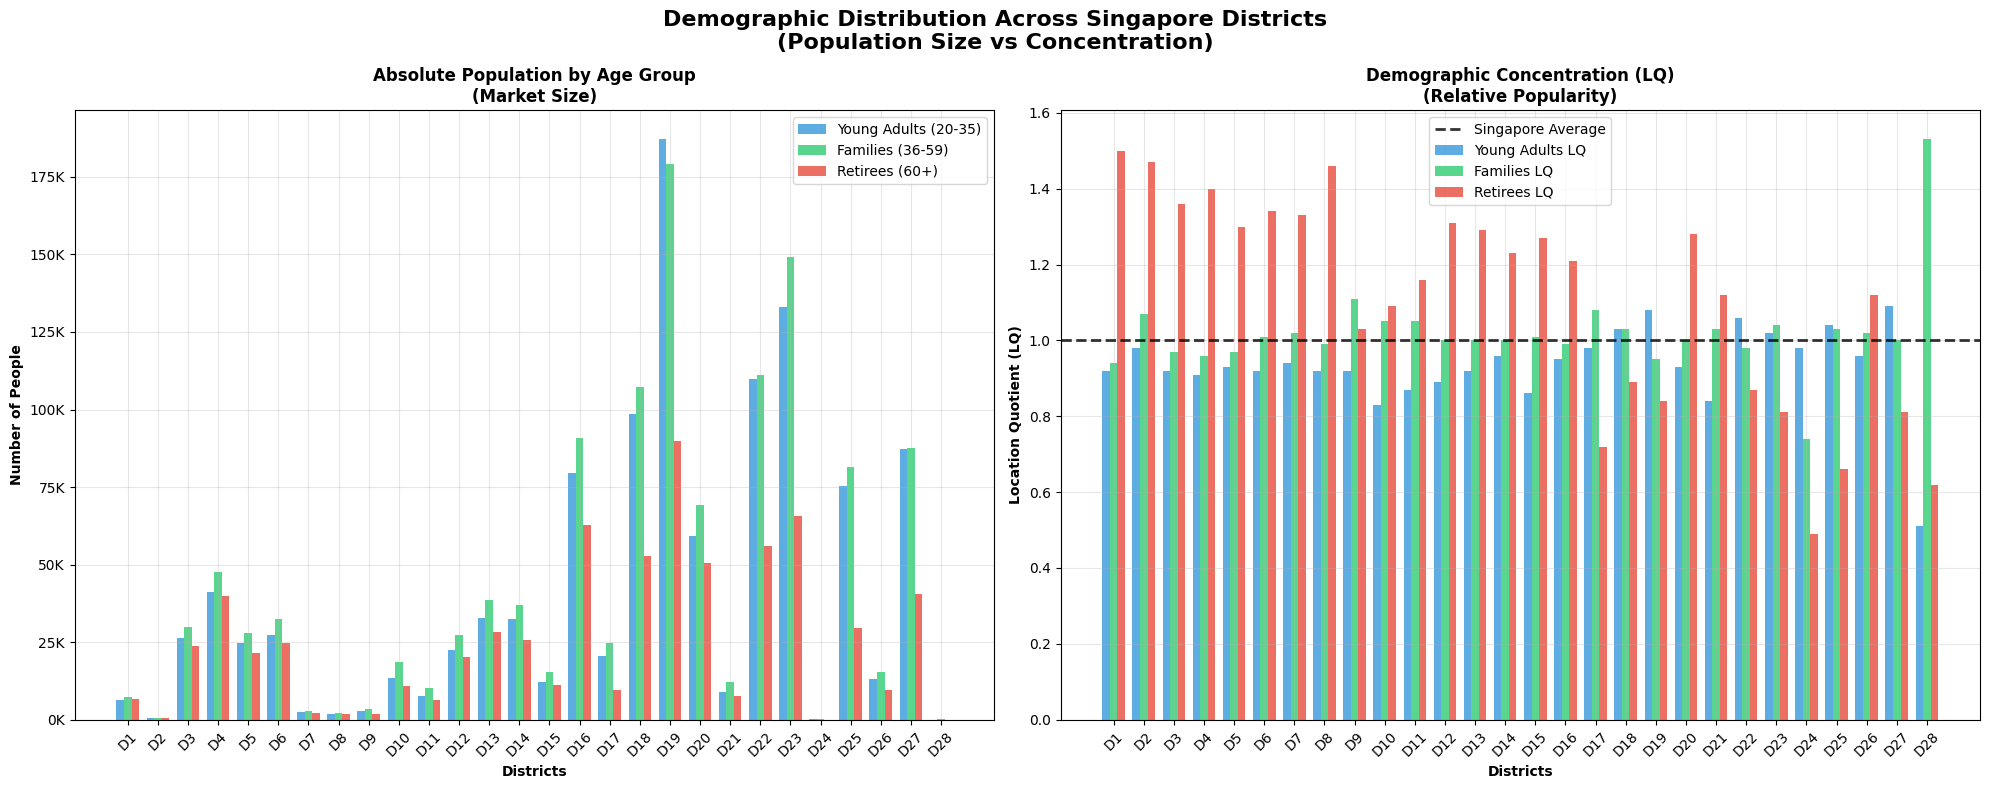


🔍 KEY INSIGHT: POPULATION SIZE ≠ DEMOGRAPHIC ATTRACTIVENESS

📊 LARGE DISTRICTS WITH LOW YOUNG ADULT APPEAL:
   D 4: Telok Blangah/Harbourfron | Pop: 157,320 (Rank #9) | Young LQ: 0.91
   D13: Macpherson/Braddell       | Pop: 122,805 (Rank #10) | Young LQ: 0.92
   D20: Bishan/Ang Mo Kio         | Pop: 220,120 (Rank #8) | Young LQ: 0.93

💡 IMPLICATION FOR PROPERTY PRICES:
   • High population ≠ High demand for specific property types
   • LQ shows where each age group actually prefers to live
   • Property prices should reflect demographic preferences, not just population size


In [ ]:
# =============================================================================
# 2. DEMOGRAPHIC DISTRIBUTION ACROSS DISTRICTS (FIXED)
# =============================================================================

def analyze_demographic_distribution(df):
    """
    Analyze how demographics vary across districts - key for property price variation
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('Demographic Distribution Across Singapore Districts\n(Population Size vs Concentration)', 
                 fontsize=16, fontweight='bold')
    
    # Sort by district number for consistent x-axis
    df_sorted = df.sort_values('District').reset_index(drop=True)
    
    # 1. ABSOLUTE COUNTS - Total Population by Age Group
    x_pos = range(len(df_sorted))
    width = 0.25
    
    bars1 = ax1.bar([x - width for x in x_pos], df_sorted['Young_Adults_20_35'], 
                   width, label='Young Adults (20-35)', color='#3498db', alpha=0.8)
    bars2 = ax1.bar(x_pos, df_sorted['Families_36_59'], 
                   width, label='Families (36-59)', color='#2ecc71', alpha=0.8)
    bars3 = ax1.bar([x + width for x in x_pos], df_sorted['Retirees_60_Plus'], 
                   width, label='Retirees (60+)', color='#e74c3c', alpha=0.8)
    
    ax1.set_xlabel('Districts', fontweight='bold')
    ax1.set_ylabel('Number of People', fontweight='bold')
    ax1.set_title('Absolute Population by Age Group\n(Market Size)', fontweight='bold')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels([f"D{d}" for d in df_sorted['District']], rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Format y-axis for better readability
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))
    
    # 2. LOCATION QUOTIENTS - Concentration Relative to Singapore Average
    bars4 = ax2.bar([x - width for x in x_pos], df_sorted['Young_Adults_LQ'], 
                   width, label='Young Adults LQ', color='#3498db', alpha=0.8)
    bars5 = ax2.bar(x_pos, df_sorted['Families_LQ'], 
                   width, label='Families LQ', color='#2ecc71', alpha=0.8)
    bars6 = ax2.bar([x + width for x in x_pos], df_sorted['Retirees_LQ'], 
                   width, label='Retirees LQ', color='#e74c3c', alpha=0.8)
    
    # Add Singapore average line
    ax2.axhline(y=1.0, color='black', linestyle='--', linewidth=2, 
               label='Singapore Average', alpha=0.8)
    
    ax2.set_xlabel('Districts', fontweight='bold')
    ax2.set_ylabel('Location Quotient (LQ)', fontweight='bold')
    ax2.set_title('Demographic Concentration (LQ)\n(Relative Popularity)', fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels([f"D{d}" for d in df_sorted['District']], rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print some insights to highlight the point
    print("\n" + "="*80)
    print("🔍 KEY INSIGHT: POPULATION SIZE ≠ DEMOGRAPHIC ATTRACTIVENESS")
    print("="*80)
    
    # Find examples where size and concentration don't match
    df_sorted['Total_Rank'] = df_sorted['Total'].rank(ascending=False)
    df_sorted['Young_LQ_Rank'] = df_sorted['Young_Adults_LQ'].rank(ascending=False)
    df_sorted['Rank_Difference'] = abs(df_sorted['Total_Rank'] - df_sorted['Young_LQ_Rank'])
    
    # Districts with big population but low young adult concentration
    big_but_unpopular = df_sorted[(df_sorted['Total_Rank'] <= 10) & (df_sorted['Young_Adults_LQ'] < 0.95)]
    if len(big_but_unpopular) > 0:
        print(f"\n📊 LARGE DISTRICTS WITH LOW YOUNG ADULT APPEAL:")
        for _, row in big_but_unpopular.iterrows():
            print(f"   D{row['District']:2d}: {row['District_Name'][:25]:<25} | "
                  f"Pop: {row['Total']:>6,} (Rank #{int(row['Total_Rank'])}) | "
                  f"Young LQ: {row['Young_Adults_LQ']:.2f}")
    
    # Districts with smaller population but high concentration
    small_but_popular = df_sorted[(df_sorted['Total_Rank'] > 15) & (df_sorted['Young_Adults_LQ'] > 1.05)]
    if len(small_but_popular) > 0:
        print(f"\n🎯 SMALLER DISTRICTS WITH HIGH YOUNG ADULT CONCENTRATION:")
        for _, row in small_but_popular.iterrows():
            print(f"   D{row['District']:2d}: {row['District_Name'][:25]:<25} | "
                  f"Pop: {row['Total']:>6,} (Rank #{int(row['Total_Rank'])}) | "
                  f"Young LQ: {row['Young_Adults_LQ']:.2f}")
    
    print(f"\n💡 IMPLICATION FOR PROPERTY PRICES:")
    print(f"   • High population ≠ High demand for specific property types")
    print(f"   • LQ shows where each age group actually prefers to live")
    print(f"   • Property prices should reflect demographic preferences, not just population size")
    
    return df_sorted

# Run the improved analysis
demographic_analysis = analyze_demographic_distribution(standardized_analysis)

In [4]:
# =============================================================================
# 2. DEMOGRAPHIC DISTRIBUTION ACROSS DISTRICTS (STACKED VERSION)
# =============================================================================

def analyze_demographic_distribution(df):
    """
    Analyze how demographics vary across districts - key for property price variation
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle('Demographic Distribution Across Singapore Districts\n(Population Size vs Concentration)', 
                 fontsize=16, fontweight='bold')
    
    # Sort by district number for consistent x-axis
    df_sorted = df.sort_values('District').reset_index(drop=True)
    x_pos = range(len(df_sorted))
    
    # 1. STACKED BAR - Absolute Population by Age Group
    ax1.bar(x_pos, df_sorted['Young_Adults_20_35'], 
           label='Young Adults (20-35)', color='#3498db', alpha=0.8)
    ax1.bar(x_pos, df_sorted['Families_36_59'], 
           bottom=df_sorted['Young_Adults_20_35'],
           label='Families (36-59)', color='#2ecc71', alpha=0.8)
    ax1.bar(x_pos, df_sorted['Retirees_60_Plus'], 
           bottom=df_sorted['Young_Adults_20_35'] + df_sorted['Families_36_59'],
           label='Retirees (60+)', color='#e74c3c', alpha=0.8)
    
    ax1.set_xlabel('Districts', fontweight='bold')
    ax1.set_ylabel('Number of People', fontweight='bold')
    ax1.set_title('Total Population by Age Group\n(Market Size)', fontweight='bold')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels([f"D{d}" for d in df_sorted['District']], rotation=45)
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Format y-axis for better readability
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))
    
    # 2. GROUPED BAR - Location Quotients (keep as grouped for better comparison)
    width = 0.25
    
    bars1 = ax2.bar([x - width for x in x_pos], df_sorted['Young_Adults_LQ'], 
                   width, label='Young Adults LQ', color='#3498db', alpha=0.8)
    bars2 = ax2.bar(x_pos, df_sorted['Families_LQ'], 
                   width, label='Families LQ', color='#2ecc71', alpha=0.8)
    bars3 = ax2.bar([x + width for x in x_pos], df_sorted['Retirees_LQ'], 
                   width, label='Retirees LQ', color='#e74c3c', alpha=0.8)
    
    # Add Singapore average line
    ax2.axhline(y=1.0, color='black', linestyle='--', linewidth=2, 
               label='Singapore Average', alpha=0.8)
    
    ax2.set_xlabel('Districts', fontweight='bold')
    ax2.set_ylabel('Location Quotient (LQ)', fontweight='bold')
    ax2.set_title('Demographic Concentration (LQ)\n(Relative Attractiveness)', fontweight='bold')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels([f"D{d}" for d in df_sorted['District']], rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Print some insights to highlight the point
    print("\n" + "="*80)
    print("🔍 KEY INSIGHT: POPULATION SIZE ≠ DEMOGRAPHIC ATTRACTIVENESS")
    print("="*80)
    
    # Find examples where size and concentration don't match
    df_sorted['Total_Rank'] = df_sorted['Total'].rank(ascending=False)
    df_sorted['Young_LQ_Rank'] = df_sorted['Young_Adults_LQ'].rank(ascending=False)
    
    # Districts with big population but low young adult concentration
    big_but_unpopular = df_sorted[(df_sorted['Total_Rank'] <= 10) & (df_sorted['Young_Adults_LQ'] < 0.95)]
    if len(big_but_unpopular) > 0:
        print(f"\n📊 LARGE DISTRICTS WITH LOW YOUNG ADULT APPEAL:")
        for _, row in big_but_unpopular.iterrows():
            print(f"   D{row['District']:2d}: {row['District_Name'][:25]:<25} | "
                  f"Pop: {row['Total']:>6,} (Rank #{int(row['Total_Rank'])}) | "
                  f"Young LQ: {row['Young_Adults_LQ']:.2f}")
    
    # Districts with smaller population but high concentration
    small_but_popular = df_sorted[(df_sorted['Total_Rank'] > 15) & (df_sorted['Young_Adults_LQ'] > 1.05)]
    if len(small_but_popular) > 0:
        print(f"\n🎯 SMALLER DISTRICTS WITH HIGH YOUNG ADULT CONCENTRATION:")
        for _, row in small_but_popular.iterrows():
            print(f"   D{row['District']:2d}: {row['District_Name'][:25]:<25} | "
                  f"Pop: {row['Total']:>6,} (Rank #{int(row['Total_Rank'])}) | "
                  f"Young LQ: {row['Young_Adults_LQ']:.2f}")
    
    print(f"\n💡 IMPLICATION FOR PROPERTY PRICES:")
    print(f"   • High population ≠ High demand for specific property types")
    print(f"   • LQ shows where each age group actually prefers to live")
    print(f"   • Property prices should reflect demographic preferences, not just population size")
    
    return df_sorted

# Run the improved analysis
demographic_analysis = analyze_demographic_distribution(standardized_analysis)

NameError: name 'standardized_analysis' is not defined